## GoBike System Data

*By: Phuong Tran*
*06/16/2020*

### Introduction
**Investigation Overview**

> The goal of this project is to dig into the bike data to understand about different factors that is affecting bike trip durations

**Dataset Overview**

> The dataset is from Bay Wheel's trip data and it is available for public use. It contains trip informations and bikers' subscribe status. This data set is taken from Lyft's website for year of 2017

In [1]:
## Import all
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### What is the structure of your dataset?

> There are 13 variables (columns) and 519700 observations (rows) in this data set. There is 2 user type: subsciber and customer.

### What is/are the main feature(s) of interest in your dataset?

> Infomation about start and end station such as station id, station name, station longtitude and latitude. There are also bike information (bike ID) as well as bikers's trip information such as trip duration in seconds and user type.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> In my opinion, trip durations, start time and user type are factors that impact trip duration the most. 

In [2]:
## Load data set in and inspect data
df = pd.read_csv('tripdata.csv')

df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


### Data Wrangling

#### Assess:
1. Convert duration second to minute and rename the column to duration_min
2. Convert start time and end time into panda date and time format for easier acess to day or month specifically.
3. There is no duplicated
4. No weird value (duration less than 0 wouldn't make any sense)

In [3]:
df.shape

(519700, 13)

In [4]:
df.isnull().sum()
## There is no Nans

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [6]:
## Nothing less than or equal to 0 so it's good
df[df['duration_sec']<=0]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type


In [7]:
## Making sure there are only 2 values in user type
df['user_type'].value_counts()

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
# Convert start time and end time into panda datetime format
df['start_time'] = pd.to_datetime(df['start_time'], infer_datetime_format=True)
df['end_time'] = pd.to_datetime(df['end_time'], infer_datetime_format=True)

In [10]:
## Adding more start columns
df['start_hour'] = df['start_time'].dt.hour
df['start_month'] = df['start_time'].dt.month
df['start_day'] = df['start_time'].dt.weekday

def to_stringday(day):
    if day==0:
        return 'Mon'
    elif day==1:
        return 'Tues'
    elif day==2:
        return 'Wed'
    elif day==3:
        return 'Thur'
    elif day==4:
        return 'Fri'
    elif day==5:
        return 'Sat'
    else:
        return 'Sun'
    
df['start_day'] = df['start_day'].apply(to_stringday)

In [11]:
## No longer need start and end time
df.drop(axis=1, columns=['start_time', 'end_time'], inplace=True)

In [12]:
df.head()

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_hour,start_month,start_day
0,80110,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,16,12,Sun
1,78800,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,15,12,Sun
2,45768,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,22,12,Sun
3,62172,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,17,12,Sun
4,43603,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,14,12,Sun


### Unvariate

#### 1. Duration
> Bikers tend to make trip duration around 700 seconcs (~12 minutes)

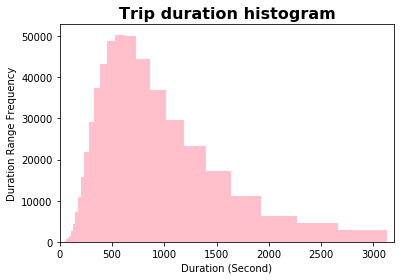

In [13]:
# 1. duration.
bins = 5 ** np.arange(2, 5.0 + 0.1, 0.1) 
plt.hist(df['duration_sec'], bins=bins, color='pink')
plt.xlim(0,3200) 
plt.xlabel('Duration (Second)')
plt.title('Trip duration histogram',  fontweight='bold', fontsize=16)
plt.ylabel('Duration Range Frequency')
plt.show();

#### Month

> June has the least bike rentals and October has the most. However, as it get cooleror hotter, people doesn't want to ride a bike, especially in June (start of summer)

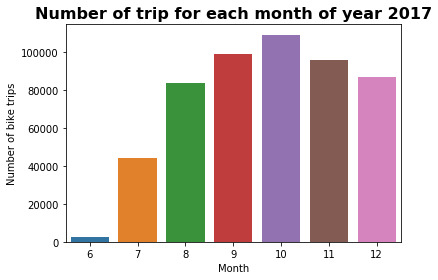

In [44]:
# 2. month
# https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.countplot(df['start_month'])
plt.title("Number of trip for each month of year 2017",  fontweight='bold', fontsize=16)
plt.ylabel('Number of bike trips')
plt.xlabel('Month')
plt.show()

#### Day of the week

> It's not expected that there are more trip during weekdays other than weekend. Maybe in the observation area, people ride their bike to work more?

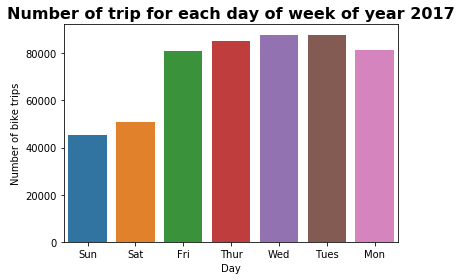

In [46]:
# 3. weekday
sns.countplot(df['start_day'])
plt.title("Number of trip for each day of week of year 2017", fontweight='bold', fontsize=16)
plt.ylabel('Number of bike trips')
plt.xlabel('Day')
plt.show()

#### Hour distribution

> There is no outlier in the graph therefore nothing extreme is in the graph. If there is then we have to trim it off. Most hour is around 2 pm and who has bike trip at the midnight?

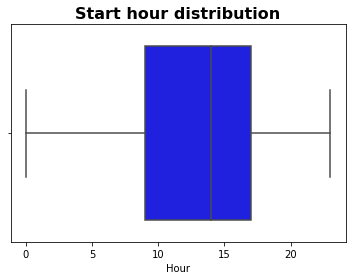

In [16]:
## 4. Hour distribution
sns.boxplot(df['start_hour'], color='blue')
plt.title('Start hour distribution', fontweight='bold', fontsize=16)
plt.xlabel('Hour')
plt.show()

# No outliers which is really good

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The trip duration is right skewed as most trip is around 10 to 13 minutes. There are also some trips with 3000 seconds, nearly one hour. 

> Ask for the month, June is the one with less bike trip. In my opinion, June is the start of summer and people tend to go out less due to hotness. However, peek is in October and it's pretty symmetric that as the whether get colder or hotter, the number of trip slightly decrease, except for June. 

> Overall, there are less bike trip in the weekend. Weekday has more bike trip. Tuesday and Wednesday has approximately the same number of trips. However, the number decrease as it get closer and closer to the weekend and rise back in the first day of the week (Monday).

> About start hour distribution, there is no outlier displayed on the boxplot therefore I'm not worried about any extreme value. However, the min and max value is 0 and 24 ... Who rent a bike in the middle of the night (Maybe visitors who want to explore the city?)

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> As of this point, there is no unsual distributions except for the right skewed in trip duration.

> Some data inspection: checking for nulls, duplicated, make sure format is right

> Some data cleaning: Change start and end from string to panda datetime format so that I could extract data from it easier. Drop some unused columns.

> Why? To make the data cleaner and to avoid misinterpreting when ploting and making decision.

### Bivariate

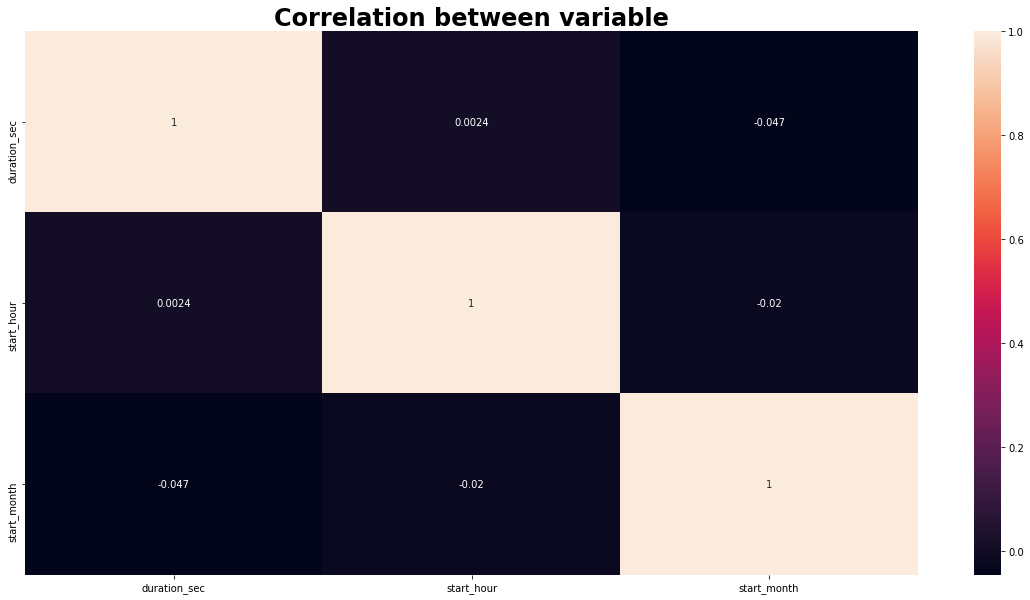

In [17]:
## Overall corralation looking and choosing out variable that has the highest correlation

plt.figure(figsize=(20,10))
sns.heatmap(df[['duration_sec', 'start_hour', 'start_month']].corr(), annot=True)
plt.title("Correlation between variable", fontsize=24, fontweight='bold')
plt.show()

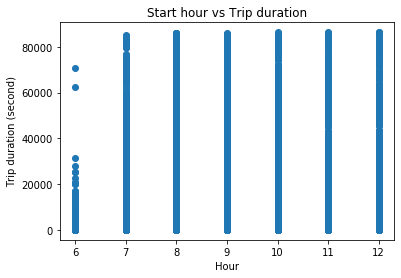

In [47]:
## Start hour vs Trip duration
plt.scatter(df['start_month'],df['duration_sec'])
plt.title('Start hour vs Trip duration')
plt.xlabel('Hour')
plt.ylabel('Trip duration (second)')
plt.show()

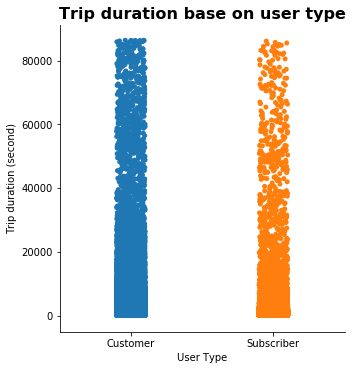

In [49]:
sns.catplot(x="user_type", y="duration_sec", data=df)
plt.title('Trip duration base on user type', fontweight='bold', fontsize=16)
plt.xlabel('User Type')
plt.ylabel('Trip duration (second)')
plt.show()

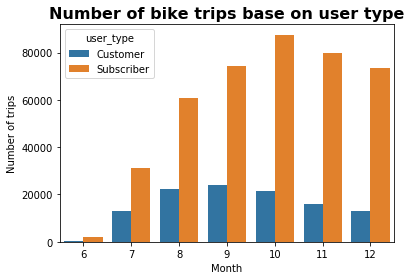

In [20]:
## This is a multivariate
sns.countplot(df['start_month'], hue=df['user_type'])
plt.title('Number of bike trips base on user type', fontweight='bold', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Number of trips')
plt.show()

C:\Users\phuon\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


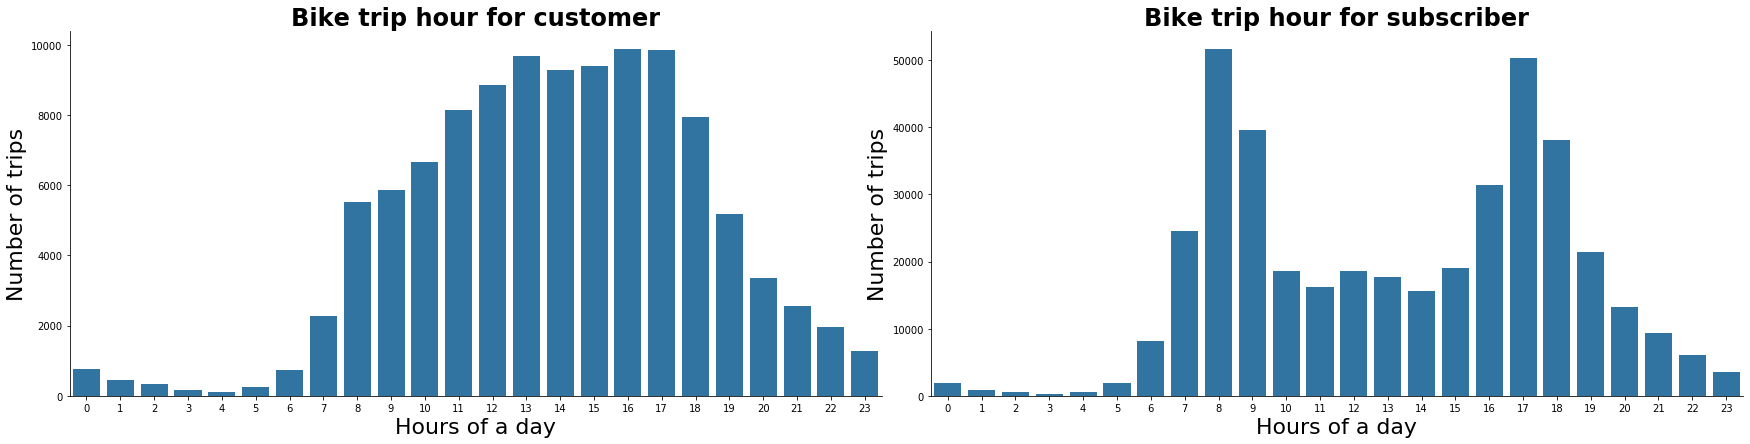

In [21]:
facetgrid = sns.FacetGrid(data=df, col='user_type', col_wrap = 4, height = 6, aspect=2, sharey=False)
facetgrid.map(sns.countplot, 'start_hour')
facetgrid.axes[0].set_title('Bike trip hour for customer', fontweight='bold', fontsize=24)
facetgrid.axes[1].set_title('Bike trip hour for subscriber', fontweight='bold', fontsize=24)
facetgrid.axes[0].set_xlabel('Hours of a day', fontsize=22)
facetgrid.axes[1].set_xlabel('Hours of a day', fontsize=22)
facetgrid.axes[0].set_ylabel('Number of trips', fontsize=22)
facetgrid.axes[1].set_ylabel('Number of trips', fontsize=22)
plt.show()

In [22]:
sub = dict(df[df['user_type']=='Subscriber']['start_station_name'].value_counts())
cus = dict(df[df['user_type']=='Customer']['start_station_name'].value_counts())

y_sub=[]
y_cus=[]

x = df['start_station_name'].value_counts().index[0:15]

for i in x:
    y_sub.append(sub[i])
    y_cus.append(cus[i])
    
dummy_df = pd.DataFrame({'customer': y_cus, 'subscriber':y_sub}, index=x)
dummy_df

,customer,subscriber
San Francisco Ferry Building (Harry Bridges Plaza),5210,9977
The Embarcadero at Sansome St,5864,7800
San Francisco Caltrain (Townsend St at 4th St),1046,11500
San Francisco Caltrain Station 2 (Townsend St at 4th St),985,11070
Market St at 10th St,1847,10113
Montgomery St BART Station (Market St at 2nd St),1750,9584
Berry St at 4th St,1439,9517
Powell St BART Station (Market St at 4th St),3174,6968
Howard St at Beale St,660,9266
Steuart St at Market St,1628,7719


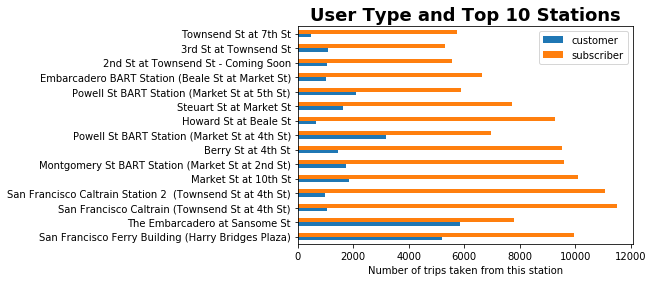

In [23]:
ax = dummy_df.plot.barh()
plt.title("User Type and Top 10 Stations", fontsize=18, fontweight='bold')
plt.xlabel('Number of trips taken from this station')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> User Type and Trip Duration: When comparing user type and trip duration, both of the user type has linear relationship with the trip duration as when the trip duration increase, it is getting less and less dense. However, customer tends to have their bike trip longer than subscriber as from around 20000 seconds, it starts to be less compact for subscibers whereas customer points remain densly for almost every of the trip durations. 

> Number of bike trip within every month and User Type: Unlike trip duration, subscriber tends to have shorter trip duration but do more trips as within every month, subscribers always have double (triple for some months) amount of number of bike trip than customers. What is more, the trip distribution for both user type is not the same. Subscriber numer of trip peek in October while for customer is in September. Subscribers number of trips decrease more when it gets colder/hotter. However, customers' number of trip is only slightly change except for June and July.

> Trip start hour and user type: Subsciber has a unimodal shape in 8 and 16 o'clock. Both of them is left skewed. However, Customer is sharply skewed when compare to subsciber.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There was no actual relationship between the top 10 stations and the number of trips have taken from that station. 

> It's hard to find out specific correlation because user type is categorical.

### Multivariate

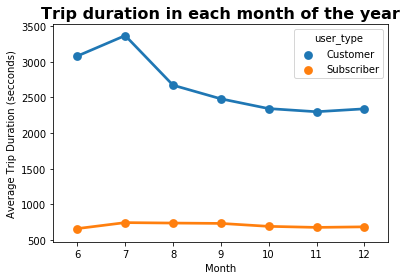

In [38]:
## Trip duration within different month base on user type

plt.figure(figsize = [6,4])
sns.pointplot(ci=None, x = df['start_month'], y = df['duration_sec'], hue = df['user_type'])
plt.title('Trip duration in each month of the year', fontweight='bold', fontsize=16)
plt.ylabel('Average Trip Duration (secconds)')
plt.xlabel('Month')
plt.show();

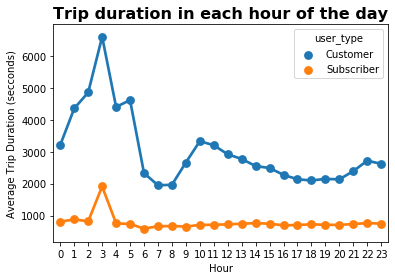

In [45]:
## Trip duration within different month base on user type

plt.figure(figsize = [6,4])
sns.pointplot(ci=None, x = df['start_hour'], y = df['duration_sec'], hue = df['user_type'])
plt.title('Trip duration in each hour of the day', fontweight='bold', fontsize=16)
plt.ylabel('Average Trip Duration (secconds)')
plt.xlabel('Hour')
plt.show();

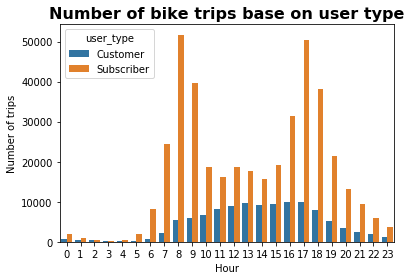

In [41]:
## This is a multivariate
sns.countplot(df['start_hour'], hue=df['user_type'])
plt.title('Number of bike trips base on user type', fontweight='bold', fontsize=16)
plt.xlabel('Hour')
plt.ylabel('Number of trips')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> When I fisrt look at the member type and trip duration, I thought that customers do bike trips more than subscribers. However, it turn out that customers has higher trip durations in average than subscribers but make lower bike trips.

> Trip Duration base on different months for each user type also support the above conclusion. Except for 3 am, trip duration for subscriber base on month remains stable while fluctuating for customers' trip duration. 

> Trip Duration base on different hour of the day for each user show a bimodal with merely normal distributed with peak at 8 am and 5 pm. Meanwhile, for customers, the number of trips spread out evenly for "working hours' and start to decrease when night time comes. For both of the user type, there is almost no trip for 2am to 4am. 

> There is no bike trip being made from January to May for the investigated year. However, subscibers' amount of bike trips is double (almost tripple for October, November, December) when compare with customers'. 


### Were there any interesting or surprising interactions between features?

> Before I started this project, I make a lot of assumptions about relationship between but after some processed, everything start to be cleared and I can see connection between factors verse user types is that:

>> The subsriber has lower average trip duration but more number of trip.

>> People in the investigated area like to make bike trip when the whether remain cool as there are less bike trip when the whether gets hotter or colder. 

>> For subscribers, they do biking scheduly since there is a bimodel shape and for customer, it's oscassionally since it's widely distributed.

In [43]:
df.to_csv('df_final.csv', index=False)